In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/tennis_data/match_2023_01_10

/content/drive/MyDrive/tennis_data/match_2023_01_10


In [4]:
df=pd.read_csv('vs_kubo_1.csv')
condition = df['Stroke'] == 'Feed'
subset = df[condition]
df = df.drop(subset.index)
len(df)

733

In [5]:
df.head()

,Player,Shot,Type,Stroke,Spin,Speed (KM/H),Point,Game,Set,Bounce Depth,...,Hit Zone,Hit Side,Hit (x),Hit (y),Hit (z),Direction,Result,Favorited,Start Time,Video Time
0,龍哉 久保,1,first_serve,Serve,Flat,98.436745,1,0,0,service_box,...,deuce,far,-0.784507,23.677910,2.704495,down the T,In,False,11:46:11,10.20
1,Yoshizawa Masatsugu,2,return,Backhand,Topspin,67.991951,1,0,0,no_mans_land,...,deuce,near,2.866704,-0.691038,1.140431,inside in,In,False,11:46:12,11.40
2,龍哉 久保,3,serve_plus_one,Forehand,Topspin,91.792122,1,0,0,no_mans_land,...,ad,far,0.378104,25.964935,1.302506,inside out,In,False,11:46:14,13.13
3,Yoshizawa Masatsugu,4,return_plus_one,Backhand,Topspin,74.643082,1,0,0,no_mans_land,...,ad,near,-2.544409,-1.053649,0.938888,cross court,In,False,11:46:15,14.51
4,龍哉 久保,5,in_play,Forehand,Topspin,88.915466,1,0,0,no_mans_land,...,ad,far,1.816429,26.248003,1.121761,inside out,In,False,11:46:17,16.15


In [6]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [7]:
df['Bounce (y)'] = abs(df['Bounce (y)'] -11.885)   #深さをネットからの距離に
df['Hit (y)'] = abs(df['Hit (y)'] -11.885)

In [8]:
df.head()

,Player,Shot,Type,Stroke,Spin,Speed (KM/H),Point,Game,Set,Bounce Depth,Bounce Zone,Bounce Side,Bounce (x),Bounce (y),Hit Depth,Hit Zone,Hit Side,Hit (x),Hit (y),Hit (z),Direction,Result,Favorited,Start Time,Video Time
0,龍哉 久保,1,first_serve,Serve,Flat,98.436745,1,0,0,service_box,deuce,near,1.540818,4.327014,no_mans_land,deuce,far,-0.784507,11.792910,2.704495,down the T,In,False,11:46:11,10.20
1,Yoshizawa Masatsugu,2,return,Backhand,Topspin,67.991951,1,0,0,no_mans_land,ad,far,0.641170,9.733553,out,deuce,near,2.866704,12.576038,1.140431,inside in,In,False,11:46:12,11.40
2,龍哉 久保,3,serve_plus_one,Forehand,Topspin,91.792122,1,0,0,no_mans_land,ad,near,-1.712300,7.789904,out,ad,far,0.378104,14.079935,1.302506,inside out,In,False,11:46:14,13.13
3,Yoshizawa Masatsugu,4,return_plus_one,Backhand,Topspin,74.643082,1,0,0,no_mans_land,ad,far,1.157406,8.686537,out,ad,near,-2.544409,12.938649,0.938888,cross court,In,False,11:46:15,14.51
4,龍哉 久保,5,in_play,Forehand,Topspin,88.915466,1,0,0,no_mans_land,ad,near,-0.719358,7.536090,out,ad,far,1.816429,14.363003,1.121761,inside out,In,False,11:46:17,16.15


In [9]:
#'Bounce (x)' 列と 'Bounce (y)' 一つずらしたdfを作成
df['Bounce (x)'] = df['Bounce (x)'].shift()
df['Bounce (y)'] = df['Bounce (y)'].shift()
df = df[df["Stroke"] != "Serve"]
df_kubo = df[df['Player'] =='龍哉 久保']
df_yoshizawa = df[df['Player'] == 'Yoshizawa Masatsugu']

In [10]:
df_yoshizawa = df_yoshizawa.drop(['Player','Point','Game', 'Set', 'Hit Depth', 'Favorited', 'Start Time', 'Video Time','Bounce Depth', 'Bounce Zone', 'Bounce Side', 'Hit Zone', 'Hit Side' ], axis=1)
df_yoshizawa.head()

,Shot,Type,Stroke,Spin,Speed (KM/H),Bounce (x),Bounce (y),Hit (x),Hit (y),Hit (z),Direction,Result
1,2,return,Backhand,Topspin,67.991951,1.540818,4.327014,2.866704,12.576038,1.140431,inside in,In
3,4,return_plus_one,Backhand,Topspin,74.643082,-1.712300,7.789904,-2.544409,12.938649,0.938888,cross court,In
5,6,in_play,Backhand,Topspin,72.283096,-0.719358,7.536090,-1.248331,13.851430,1.185831,cross court,In
7,9,in_play,Backhand,Topspin,78.857880,1.486005,6.165491,1.727386,8.694775,1.127259,inside in,In
11,2,return,Forehand,Topspin,69.152916,-1.410573,4.388790,-1.772645,10.835678,1.343061,inside out,In


In [11]:
import warnings
# 警告文を非表示
warnings.simplefilter('ignore')

from sklearn.preprocessing import LabelEncoder

# ラベルエンコーディングを行うために、LabelEncoderクラスをインスタンス化（利用するためのおまじないだとお考えください）
enc = LabelEncoder() # encはencoderの省略名称である変数です。
# fit()によりTypeカラムに対してラベルエンコーディングを行います。
label_encoder = enc.fit(df_yoshizawa[["Type"]])

# カラムの要素を取得
# transform()で数値へ変換
integer_classes = label_encoder.transform(label_encoder.classes_)
#print('Integer classes:',integer_classes)

df_yoshizawa["Type"] = label_encoder.transform(df_yoshizawa[["Type"]])

#print(df_yoshizawa[["Type"]]) #'first_serve' 'in_play' 'none' 'return' 'return_plus_one' 'second_serve''serve' 'serve_plus_one'] [0 1 2 3 4 5 6 7] に

#Stroke

label_encoder = enc.fit(df_yoshizawa[["Stroke"]])

# カラムの要素を取得
integer_classes = label_encoder.transform(label_encoder.classes_)

df_yoshizawa["Stroke"] = label_encoder.transform(df_yoshizawa[["Stroke"]])

#Spin Categorical classes: ['Flat' 'Kick' 'Slice' 'Topspin'] Integer classes: [0 1 2 3]

label_encoder = enc.fit(df_yoshizawa[["Spin"]])
integer_classes = label_encoder.transform(label_encoder.classes_)
df_yoshizawa["Spin"] = label_encoder.transform(df_yoshizawa[["Spin"]])

#Direction Categorical classes: ['---' 'cross court' 'down the T' 'down the line' 'inside in' 'inside out''out wide']Integer classes: [0 1 2 3 4 5 6]
label_encoder = enc.fit(df_yoshizawa[["Direction"]])
integer_classes = label_encoder.transform(label_encoder.classes_)
df_yoshizawa["Direction"] = label_encoder.transform(df_yoshizawa[["Direction"]])

#Result  Categorical classes: ['In' 'Net' 'Out'] Integer classes: [0 1 2]
label_encoder = enc.fit(df_yoshizawa[["Result"]])
integer_classes = label_encoder.transform(label_encoder.classes_)
df_yoshizawa["Result"] = label_encoder.transform(df_yoshizawa[["Result"]])


In [12]:
# 必要なライブラリをインポートする
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

data = df_yoshizawa

# 特徴量と目的変数を分ける
X = data.drop('Result', axis=1)
y = data['Result']

# 訓練用データとテスト用データに分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# ランダムフォレスト分類器を作成する
rfc = RandomForestClassifier()

# モデルを訓練する
rfc.fit(X_train, y_train)


# 各特徴量の重要度を取得する
importances = rfc.feature_importances_

# 特徴量の重要度を降順にソートする
indices = np.argsort(importances)[::-1]

# 特徴量の名前を取得する
feature_names = X_train.columns.values

# 特徴量の寄与率を出力する
for i in range(len(feature_names)):
    print(f"{feature_names[indices[i]]}: {importances[indices[i]]}")


# テスト用データを用いてモデルの精度を評価する
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# モデルの精度を出力する
print("Accuracy:", accuracy)

Speed (KM/H): 0.20457839033839165
Hit (z): 0.13847335406766556
Hit (x): 0.12810321828567633
Hit (y): 0.11561688563594323
Bounce (y): 0.10443257034854456
Bounce (x): 0.10119684016585578
Shot: 0.06373901600246196
Spin: 0.041189614693044836
Type: 0.03572379005188736
Direction: 0.03546903568850002
Stroke: 0.03147728472202873
Accuracy: 0.75


In [13]:

# テスト用データのクラスの確率を予測する
y_proba = rfc.predict_proba(X_test)

# テスト用データの各サンプルに対する予測確率を出力する
for i in range(len(y_test)):
    print(f"Sample {i}: Class 0: {y_proba[i][0]}, Class 1: {y_proba[i][1]}, Class 2: {y_proba[i][2]}")

Sample 0: Class 0: 0.91, Class 1: 0.05, Class 2: 0.04
Sample 1: Class 0: 0.94, Class 1: 0.04, Class 2: 0.02
Sample 2: Class 0: 0.88, Class 1: 0.04, Class 2: 0.08
Sample 3: Class 0: 0.65, Class 1: 0.16, Class 2: 0.19
Sample 4: Class 0: 0.9, Class 1: 0.03, Class 2: 0.07
Sample 5: Class 0: 0.83, Class 1: 0.01, Class 2: 0.16
Sample 6: Class 0: 0.77, Class 1: 0.05, Class 2: 0.18
Sample 7: Class 0: 0.83, Class 1: 0.03, Class 2: 0.14
Sample 8: Class 0: 0.93, Class 1: 0.05, Class 2: 0.02
Sample 9: Class 0: 0.59, Class 1: 0.17, Class 2: 0.24
Sample 10: Class 0: 0.95, Class 1: 0.04, Class 2: 0.01
Sample 11: Class 0: 0.71, Class 1: 0.08, Class 2: 0.21
Sample 12: Class 0: 0.96, Class 1: 0.02, Class 2: 0.02
Sample 13: Class 0: 0.85, Class 1: 0.0, Class 2: 0.15
Sample 14: Class 0: 0.89, Class 1: 0.08, Class 2: 0.03
Sample 15: Class 0: 0.9, Class 1: 0.02, Class 2: 0.08
Sample 16: Class 0: 0.73, Class 1: 0.04, Class 2: 0.23
Sample 17: Class 0: 0.88, Class 1: 0.09, Class 2: 0.03
Sample 18: Class 0: 0.8

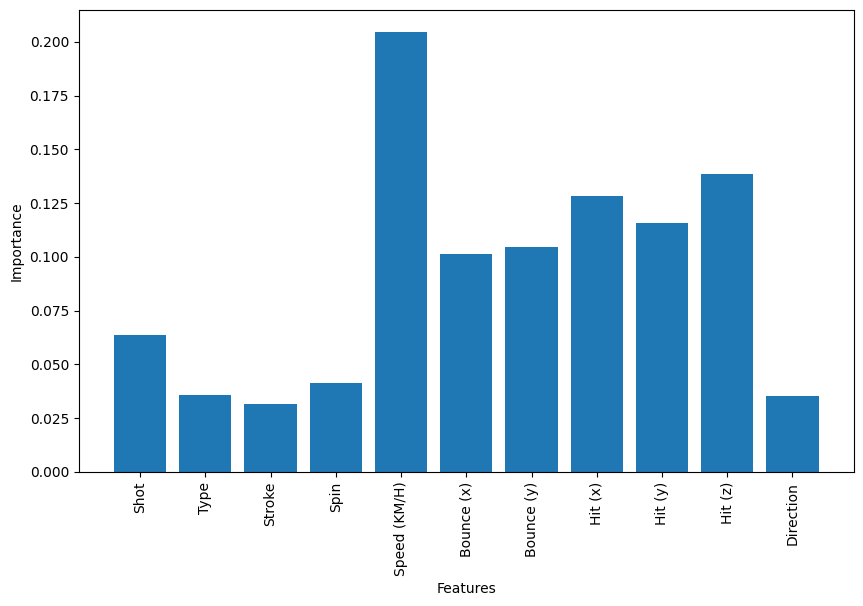

In [14]:
# グラフのサイズを設定する
plt.figure(figsize=(10, 6))

# 棒グラフを作成する
plt.bar(range(len(importances)), importances, align='center')
plt.xticks(range(len(feature_names)), feature_names, rotation=90)

# グラフのラベルを設定する
plt.xlabel('Features')
plt.ylabel('Importance')

# グラフを表示する
plt.show()

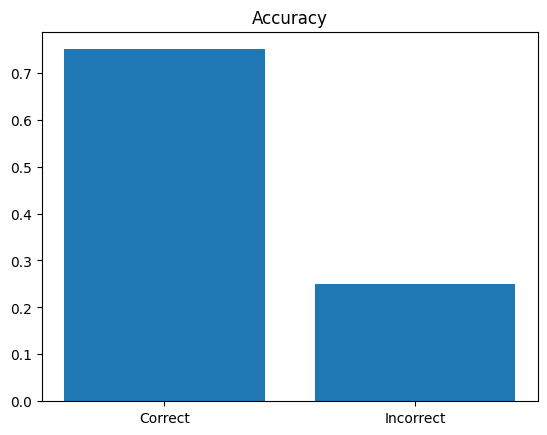

In [29]:
import matplotlib.pyplot as plt

# テストデータに対する予測結果を取得する
y_pred = rfc.predict(X_test)

# 実際の結果と予測結果を比較する
correct = y_pred == y_test

# 正解率を計算する
accuracy = correct.sum() / len(correct)

# 正解率をグラフ化する
plt.bar(['Correct', 'Incorrect'], [accuracy, 1-accuracy])
plt.title('Accuracy')
plt.show()

In [16]:
# テストデータと予測結果を取得する
y_pred = rfc.predict(X_test)
df_test = X_test.copy()
df_test['Result'] = y_test
df_test['Predicted Result'] = y_pred


56
14


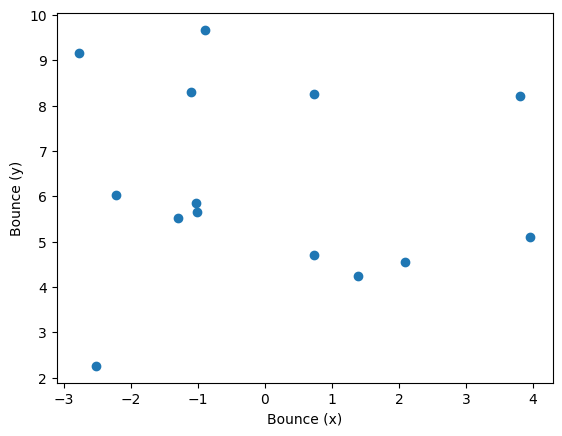

In [17]:
print(len(df_test))
import matplotlib.pyplot as plt

# Resultが1または2の行のインデックスを取得する
result_indices = df_test[(df_test['Result'] == 1) | (df_test['Result'] == 2)].index
print(len(result_indices))

# Bounce(x)とBounce(y)の値を取得する
bounce_x = df_test.loc[result_indices, 'Bounce (x)']
bounce_y = df_test.loc[result_indices, 'Bounce (y)']

# 散布図を作成する
plt.scatter(bounce_x, bounce_y)

# 軸ラベルを設定する
plt.xlabel('Bounce (x)')
plt.ylabel('Bounce (y)')

# グラフを表示する
plt.show()


Explained variance ratio: [0.87362704 0.04803067]


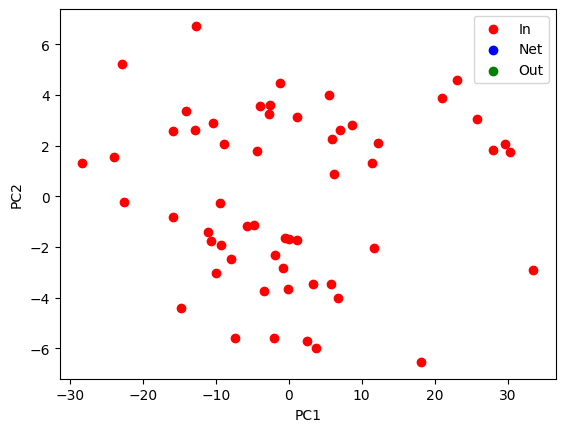

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# テストデータを用いて予測を行う
y_pred = rfc.predict(X_test)

# PCAで特徴量を2次元に変換する
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# 特徴の寄与率を出力する
print("Explained variance ratio:", pca.explained_variance_ratio_)

# 予測結果をプロットする
plt.scatter(X_test_pca[y_pred==0, 0], X_test_pca[y_pred==0, 1], c='red', label='In')
plt.scatter(X_test_pca[y_pred==1, 0], X_test_pca[y_pred==1, 1], c='blue', label='Net')
plt.scatter(X_test_pca[y_pred==2, 0], X_test_pca[y_pred==2, 1], c='green', label='Out')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## 新データで予測

In [19]:
df_new = pd.read_csv('match_2023_12_23.csv')
condition = df_new['Stroke'] == 'Feed'
subset = df_new[condition]
df_new = df_new.drop(subset.index)
df_new['Bounce (y)'] = abs(df_new['Bounce (y)'] -11.885)   #深さをネットからの距離に
df_new['Hit (y)'] = abs(df_new['Hit (y)'] -11.885)
df_new['Bounce (x)'] = df_new['Bounce (x)'].shift()
df_new['Bounce (y)'] = df_new['Bounce (y)'].shift()
df_new = df_new[df_new["Stroke"] != "Serve"]
df_new_kubo = df_new[df_new['Player'] =='龍哉 久保']
df_new_yoshizawa = df_new[df_new['Player'] == 'Yoshizawa Masatsugu']

In [20]:
df_new_yoshizawa.head()

,Player,Shot,Type,Stroke,Spin,Speed (KM/H),Point,Game,Set,Bounce Depth,Bounce Zone,Bounce Side,Bounce (x),Bounce (y),Hit Depth,Hit Zone,Hit Side,Hit (x),Hit (y),Hit (z),Direction,Result,Favorited,Start Time,Video Time
2,Yoshizawa Masatsugu,2,return,Forehand,Topspin,64.693878,18,0,0,service_box,deuce,near,-1.049904,3.974868,no_mans_land,deuce,far,-1.525902,12.966954,1.225178,cross court,In,False,05:54:44,260.329987
4,Yoshizawa Masatsugu,4,return_plus_one,Forehand,Slice,61.960609,18,0,0,no_mans_land,deuce,near,-1.390404,3.571020,no_mans_land,deuce,far,-2.269601,10.074612,1.133872,cross court,In,False,05:54:47,263.369995
6,Yoshizawa Masatsugu,6,in_play,Backhand,Topspin,59.128944,18,0,0,service_box,deuce,near,1.601858,10.498333,out,ad,far,2.037655,12.966954,0.892581,down the line,In,False,05:54:50,266.279999
8,Yoshizawa Masatsugu,8,in_play,Backhand,Topspin,66.406624,18,0,0,no_mans_land,ad,near,1.753331,6.068365,out,ad,far,1.721740,12.007624,0.892581,cross court,In,False,05:54:53,269.500000
11,Yoshizawa Masatsugu,2,return,Backhand,Topspin,67.209190,20,0,0,service_box,ad,near,2.353571,4.850056,out,ad,far,2.859036,12.159912,1.331611,cross court,In,False,05:55:14,290.829987


In [21]:
df_new_yoshizawa = df_new_yoshizawa.drop(['Player','Point','Game', 'Set', 'Hit Depth', 'Favorited', 'Start Time', 'Video Time','Bounce Depth', 'Bounce Zone', 'Bounce Side', 'Hit Zone', 'Hit Side' ], axis=1)
df_new_yoshizawa.head()

,Shot,Type,Stroke,Spin,Speed (KM/H),Bounce (x),Bounce (y),Hit (x),Hit (y),Hit (z),Direction,Result
2,2,return,Forehand,Topspin,64.693878,-1.049904,3.974868,-1.525902,12.966954,1.225178,cross court,In
4,4,return_plus_one,Forehand,Slice,61.960609,-1.390404,3.571020,-2.269601,10.074612,1.133872,cross court,In
6,6,in_play,Backhand,Topspin,59.128944,1.601858,10.498333,2.037655,12.966954,0.892581,down the line,In
8,8,in_play,Backhand,Topspin,66.406624,1.753331,6.068365,1.721740,12.007624,0.892581,cross court,In
11,2,return,Backhand,Topspin,67.209190,2.353571,4.850056,2.859036,12.159912,1.331611,cross court,In


In [22]:
import warnings
# 警告文を非表示
warnings.simplefilter('ignore')

from sklearn.preprocessing import LabelEncoder

# ラベルエンコーディングを行うために、LabelEncoderクラスをインスタンス化（利用するためのおまじないだとお考えください）
enc = LabelEncoder() # encはencoderの省略名称である変数です。
# fit()によりTypeカラムに対してラベルエンコーディングを行います。
label_encoder = enc.fit(df_new_yoshizawa[["Type"]])
integer_classes = label_encoder.transform(label_encoder.classes_)
df_new_yoshizawa["Type"] = label_encoder.transform(df_new_yoshizawa[["Type"]])

#Stroke

label_encoder = enc.fit(df_new_yoshizawa[["Stroke"]])
integer_classes = label_encoder.transform(label_encoder.classes_)
df_new_yoshizawa["Stroke"] = label_encoder.transform(df_new_yoshizawa[["Stroke"]])

#Spin Categorical classes: ['Flat' 'Kick' 'Slice' 'Topspin'] Integer classes: [0 1 2 3]
label_encoder = enc.fit(df_new_yoshizawa[["Spin"]])
integer_classes = label_encoder.transform(label_encoder.classes_)
df_new_yoshizawa["Spin"] = label_encoder.transform(df_new_yoshizawa[["Spin"]])

#Direction Categorical classes: ['---' 'cross court' 'down the T' 'down the line' 'inside in' 'inside out''out wide']Integer classes: [0 1 2 3 4 5 6]
label_encoder = enc.fit(df_new_yoshizawa[["Direction"]])
integer_classes = label_encoder.transform(label_encoder.classes_)
df_new_yoshizawa["Direction"] = label_encoder.transform(df_new_yoshizawa[["Direction"]])

#Result  Categorical classes: ['In' 'Net' 'Out'] Integer classes: [0 1 2]
label_encoder = enc.fit(df_new_yoshizawa[["Result"]])
integer_classes = label_encoder.transform(label_encoder.classes_)
df_new_yoshizawa["Result"] = label_encoder.transform(df_new_yoshizawa[["Result"]])

In [23]:
df_new_yoshizawa_1 = df_new_yoshizawa.drop(['Result'], axis =1)
df_new_yoshizawa_1.head()
len(df_new_yoshizawa_1)

94

In [24]:
# 未知のデータに対して予測を実行する
y_pred = rfc.predict(df_new_yoshizawa_1)

# 予測結果を出力する
print(y_pred)
print(len(y_pred))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
94


In [25]:
df_new_yoshizawa['Predicted'] = y_pred
df_new_yoshizawa

,Shot,Type,Stroke,Spin,Speed (KM/H),Bounce (x),Bounce (y),Hit (x),Hit (y),Hit (z),Direction,Result,Predicted
2,2,1,3,2,64.693878,-1.049904,3.974868,-1.525902,12.966954,1.225178,0,0,0
4,4,2,3,1,61.960609,-1.390404,3.571020,-2.269601,10.074612,1.133872,0,0,0
6,6,0,1,2,59.128944,1.601858,10.498333,2.037655,12.966954,0.892581,1,0,0
8,8,0,1,2,66.406624,1.753331,6.068365,1.721740,12.007624,0.892581,0,0,0
11,2,1,1,2,67.209190,2.353571,4.850056,2.859036,12.159912,1.331611,0,0,0
15,2,1,3,2,81.926178,-1.942881,5.721813,-1.840279,13.370955,1.095965,1,0,0
17,4,2,1,2,75.368713,2.511528,10.078634,2.922219,12.261439,0.892581,0,0,0
20,2,1,1,2,75.111740,2.369423,5.772841,3.401839,12.196266,1.035593,0,0,0
22,4,2,1,2,85.846512,1.141296,6.935366,2.466373,11.565958,1.391710,0,0,0
27,3,3,1,2,76.694168,-0.646455,9.871183,-0.749613,12.978408,0.882649,1,0,0


In [26]:
indices = df_new_yoshizawa[df_new_yoshizawa['Result'] != df_new_yoshizawa['Predicted']].index.tolist()

# 異なる行の数を取得
count = len(indices)

# 結果を出力
print(f"異なるインデックス: {indices}")
print(f"異なる行の数: {count}")
print(f"正答率:{1- count/len(df_new_yoshizawa)}")

異なるインデックス: [79, 88, 93, 114, 124, 133, 155, 178, 186, 192, 198, 206, 213, 221, 227, 234]
異なる行の数: 16
正答率:0.8297872340425532


In [27]:
count_net = df_new_yoshizawa.loc[(df_new_yoshizawa['Result'] == 1) & (df_new_yoshizawa['Predicted'] == 1)]
count_out = df_new_yoshizawa.loc[(df_new_yoshizawa['Result'] == 2) & (df_new_yoshizawa['Predicted'] == 2)]
print(f"ネットであると正しく予測したインデックス:{count_net}")
print(f"アウトであると正しく予測したインデックス:{count_out}")

ネットであると正しく予測したインデックス:Empty DataFrame
Columns: [Shot, Type, Stroke, Spin, Speed (KM/H), Bounce (x), Bounce (y), Hit (x), Hit (y), Hit (z), Direction, Result, Predicted]
Index: []
アウトであると正しく予測したインデックス:Empty DataFrame
Columns: [Shot, Type, Stroke, Spin, Speed (KM/H), Bounce (x), Bounce (y), Hit (x), Hit (y), Hit (z), Direction, Result, Predicted]
Index: []


94
[]


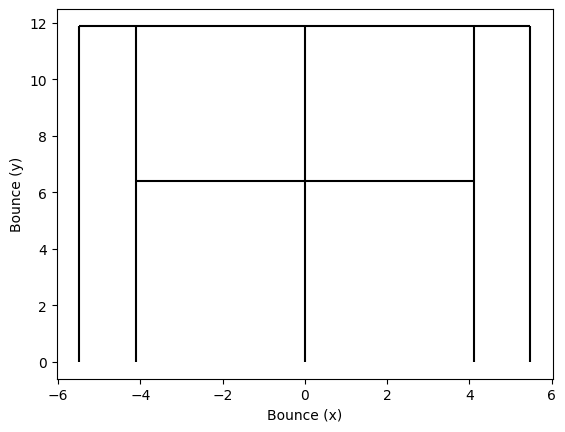

In [28]:
print(len(df_new_yoshizawa))
import matplotlib.pyplot as plt

# Resultが1または2の行のインデックスを取得する
index_list = df_new_yoshizawa[(df_new_yoshizawa['Result']==2) & (df_new_yoshizawa['Predicted']==2)].index.tolist()
print(index_list)

# Bounce(x)とBounce(y)の値を取得する
bounce_x = df_new_yoshizawa.loc[index_list, 'Bounce (x)']
bounce_y = df_new_yoshizawa.loc[index_list, 'Bounce (y)']

# 散布図を作成する
plt.plot(bounce_x, bounce_y, marker="o",color="black", linewidth=0)
plt.hlines(11.885,-5.485,5.485, color="black")  #ベーススライン
plt.hlines(6.40,-4.115,4.115, color="black")   #サービスライン
plt.vlines(0,0,11.885,color="black")    #センターライン
plt.vlines(-5.485,0,11.885,color="black")
plt.vlines(5.485,0,11.885,color="black")    #ダブルスサイドライン
plt.vlines(-4.115,0,11.885,color="black")
plt.vlines(4.115,0,11.885,color="black")     #シングルスサイドライン

# 軸ラベルを設定する
plt.xlabel('Bounce (x)')
plt.ylabel('Bounce (y)')

# グラフを表示する
plt.show()
